## 1. Importing Libraries

In [176]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import eda_helper_functions

from sklearn.ensemble import IsolationForest

from pathlib import Path

import importlib
importlib.reload(eda_helper_functions)

<module 'eda_helper_functions' from 'F:\\Flight-Price-Prediction\\notebooks\\eda_helper_functions.py'>

## 2. Reading the Data

In [2]:
PROJECT_DIR = Path(r'F:\Flight-Price-Prediction')
DATA_DIR = "data"

In [145]:
def read_data(name):
    file_name = f"{name}.csv"
    file_path = PROJECT_DIR/DATA_DIR/"train"/file_name

    return pd.read_csv(file_path)

In [146]:
data = read_data("train")

In [147]:
data.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [148]:
data = (
    data.assign(
        **{
            col: pd.to_datetime(data[col], dayfirst=True, format="mixed")
            for col in ["date_of_journey","dep_time","arrival_time"]
        }
    )
)

## 3. High-level summary of data

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6836 entries, 0 to 6835
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6836 non-null   object        
 1   date_of_journey  6836 non-null   datetime64[ns]
 2   source           6836 non-null   object        
 3   destination      6836 non-null   object        
 4   dep_time         6836 non-null   datetime64[ns]
 5   arrival_time     6836 non-null   datetime64[ns]
 6   duration         6836 non-null   int64         
 7   total_stops      6835 non-null   float64       
 8   additional_info  6836 non-null   object        
 9   price            6836 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 534.2+ KB


In [150]:
data.describe(include = "number")

,duration,total_stops,price
count,6836.000000,6835.000000,6836.000000
mean,637.543885,0.819166,9080.772528
std,504.596337,0.676164,4607.406836
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5228.000000
50%,510.000000,1.000000,8366.000000
75%,930.000000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [151]:
(
    data
    .assign(total_stops = data.total_stops.astype('O'))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,6836,6836,6836,6835.0,6836
unique,9,5,5,4.0,9
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2453,2860,2860,3583.0,5368


## 4. High level analysis of missing values

In [152]:
eda_helper_functions.missing_info(data)

,count,percentage
variable,,
total_stops,1,0.014628


## 5. High level analysis of outliers

In [57]:
forest = IsolationForest(random_state=42)

In [65]:
(
    data
    .assign(outliers = forest.fit_predict(
        data
        .drop(columns = "price")
        .select_dtypes(include = "number")
    ))
    .query("outliers == -1")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outliers
0,Jet Airways,2019-03-03,Delhi,Cochin,02:15:00,04:25:00,1570,1.0,No Info,17024,-1
4,Air India,2019-06-12,Delhi,Cochin,09:45:00,09:25:00,1420,1.0,No Info,7480,-1
5,Indigo,2019-06-21,Mumbai,Hyderabad,09:10:00,10:40:00,90,0.0,No Info,5755,-1
9,Jet Airways,2019-05-09,Delhi,Cochin,05:30:00,12:35:00,425,2.0,In-flight meal not included,15544,-1
12,Air India,2019-03-06,Mumbai,Hyderabad,21:10:00,16:55:00,255,2.0,No Info,17327,-1
...,...,...,...,...,...,...,...,...,...,...,...
6819,Spicejet,2019-03-27,Delhi,Cochin,08:45:00,13:15:00,270,1.0,No check-in baggage included,4414,-1
6824,Air India,2019-03-27,Mumbai,Hyderabad,19:30:00,20:45:00,75,0.0,No Info,2575,-1
6825,Air India,2019-05-09,Kolkata,Bangalore,14:30:00,08:55:00,1105,2.0,No Info,14214,-1
6828,Jet Airways,2019-06-06,Delhi,Cochin,21:50:00,19:00:00,1270,1.0,No Info,14714,-1


## 6. Pair Plots

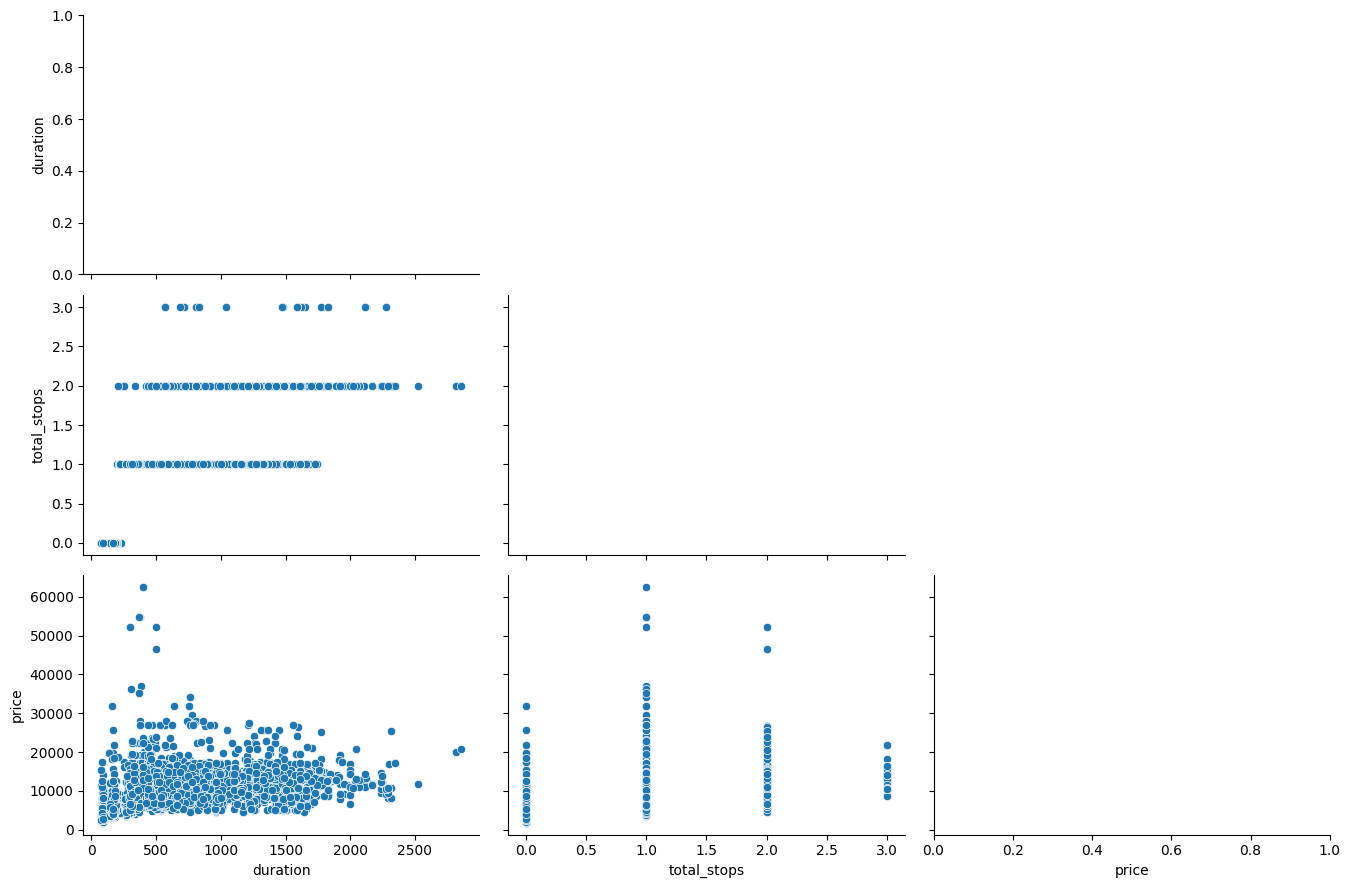

In [66]:
eda_helper_functions.pair_plots(data)

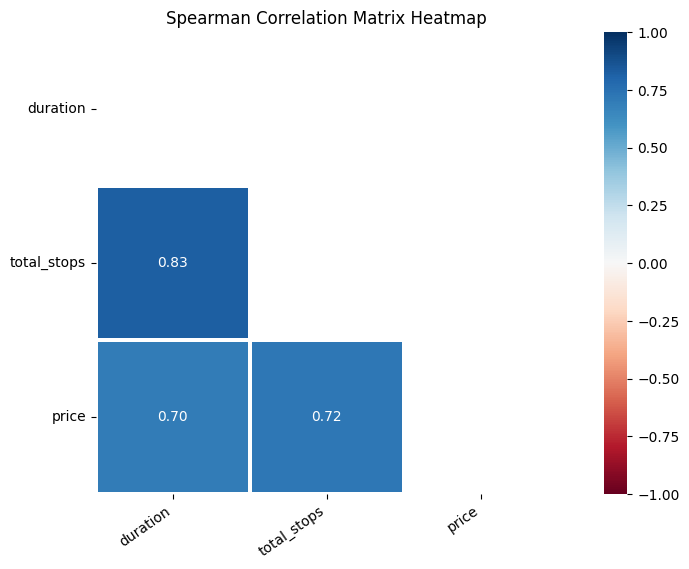

In [67]:
eda_helper_functions.correlation_heatmap(data)

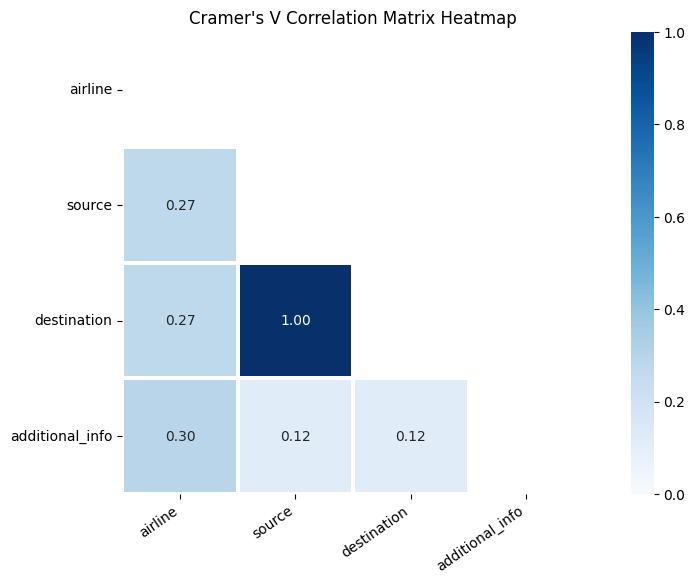

In [153]:
eda_helper_functions.cramersV_heatmap(data)

## 7. Detailed Analysis

In [73]:
data.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 7.1 `airline`

In [74]:
data.airline

0       Jet Airways
1           Vistara
2          Spicejet
3            Indigo
4         Air India
           ...     
6831         Indigo
6832         Indigo
6833      Air India
6834    Jet Airways
6835          Goair
Name: airline, Length: 6836, dtype: object

In [84]:
eda_helper_functions.cat_summary(data,var = 'airline')

0       Jet Airways
1           Vistara
2          Spicejet
3            Indigo
4         Air India
           ...     
6831         Indigo
6832         Indigo
6833      Air India
6834    Jet Airways
6835          Goair
Name: airline, Length: 6836, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,836 / 6,836 rows


,
count,6836
unique,9
top,Jet Airways
freq,2453


,count,percentage
category,,
Jet Airways,2453,35.883558
Indigo,1341,19.616735
Air India,1131,16.544763
Multiple Carriers,754,11.029842
Spicejet,525,7.679930
Vistara,300,4.388531
Air Asia,207,3.028087
Goair,124,1.813926
Trujet,1,0.014628


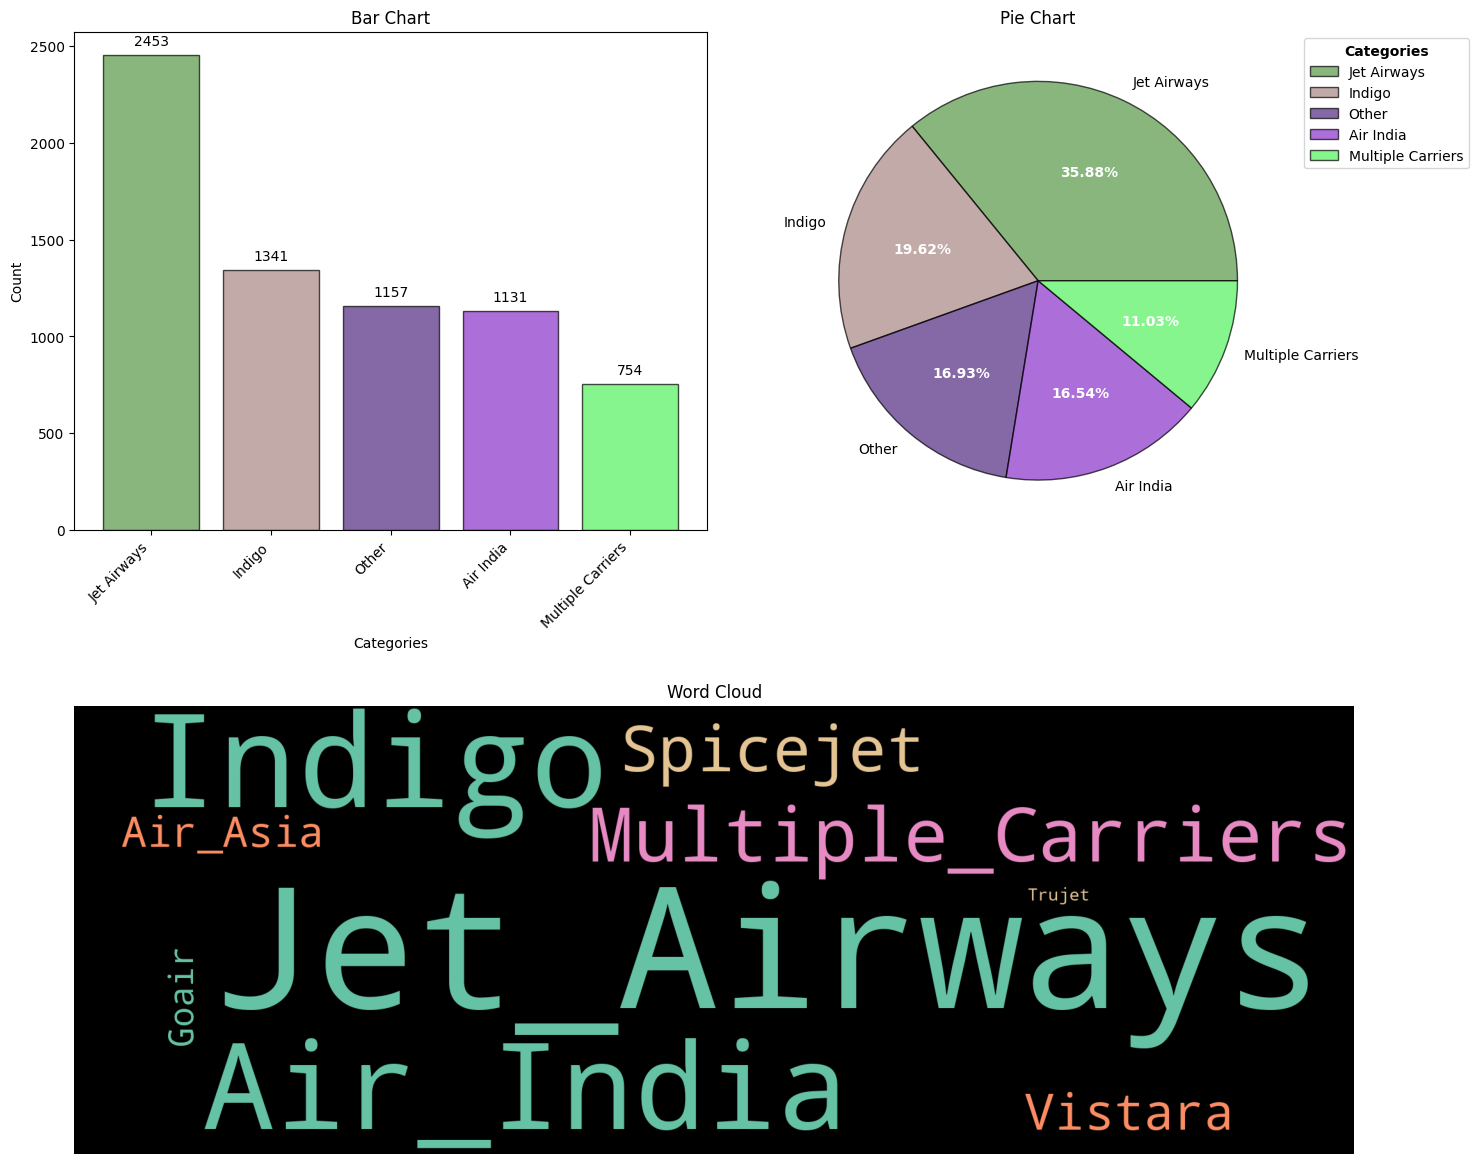

In [89]:
eda_helper_functions.cat_univar_plots(data,var = 'airline',figsize=(15,12),k=4)

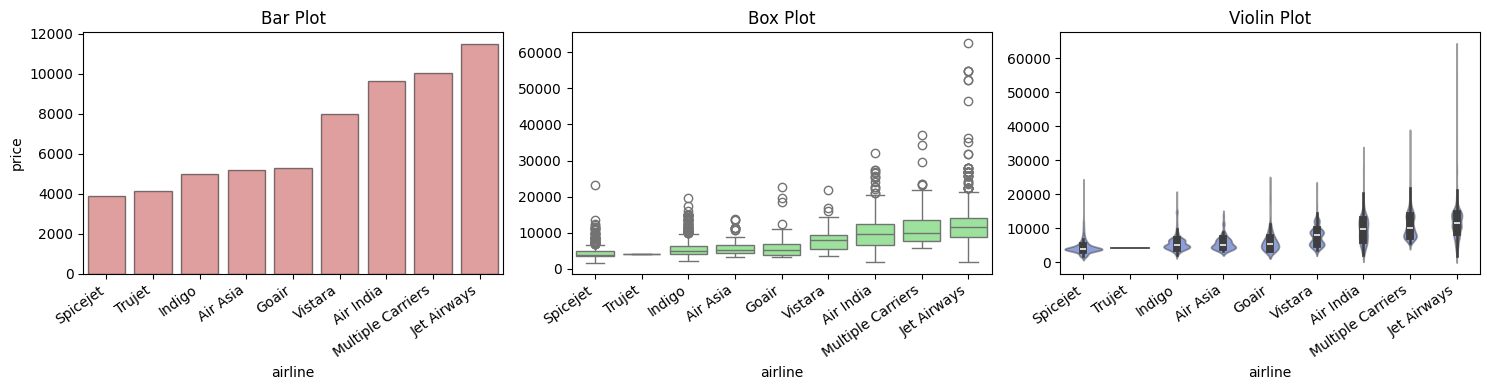

In [90]:
eda_helper_functions.num_cat_bivar_plots(data,num_var = 'price',cat_var = 'airline',estimator ='median')

In [98]:
eda_helper_functions.num_cat_hyp_testing(data,num_var = 'price',cat_var = 'airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 465.78426177222786
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3079.935515437591
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


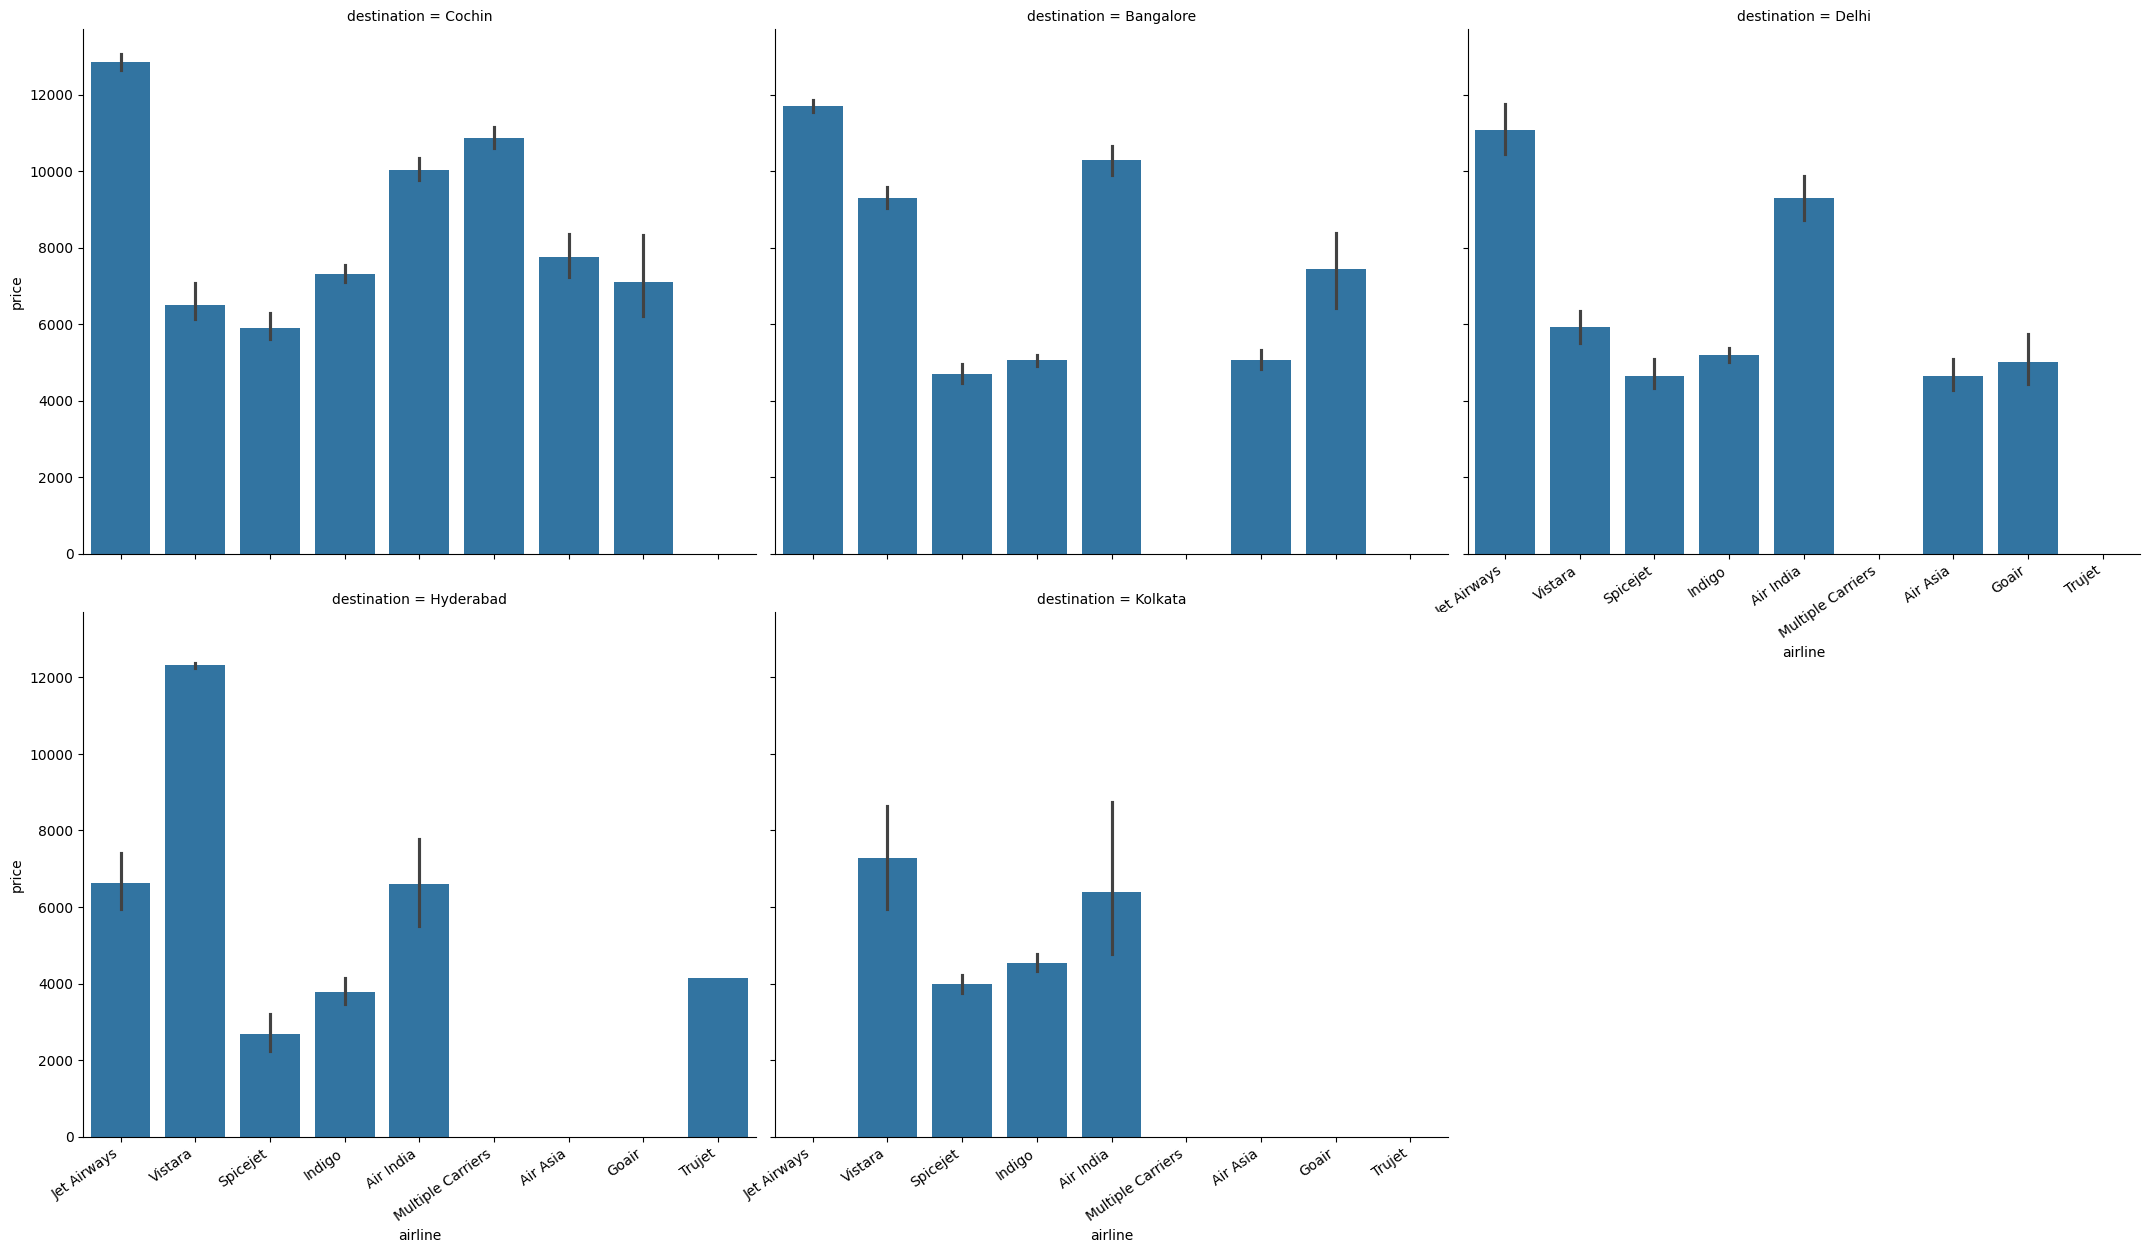

In [108]:
airline_grid = sns.FacetGrid(
    data = data,
    col = "destination",
    col_wrap=3,
    height = 6,
    aspect = 1.2, 
    sharey=True
)

airline_grid.map(sns.barplot,"airline","price",order = data.airline.unique())

for ax in airline_grid.axes[2:]:
    eda_helper_functions.rotate_xlabels(ax)

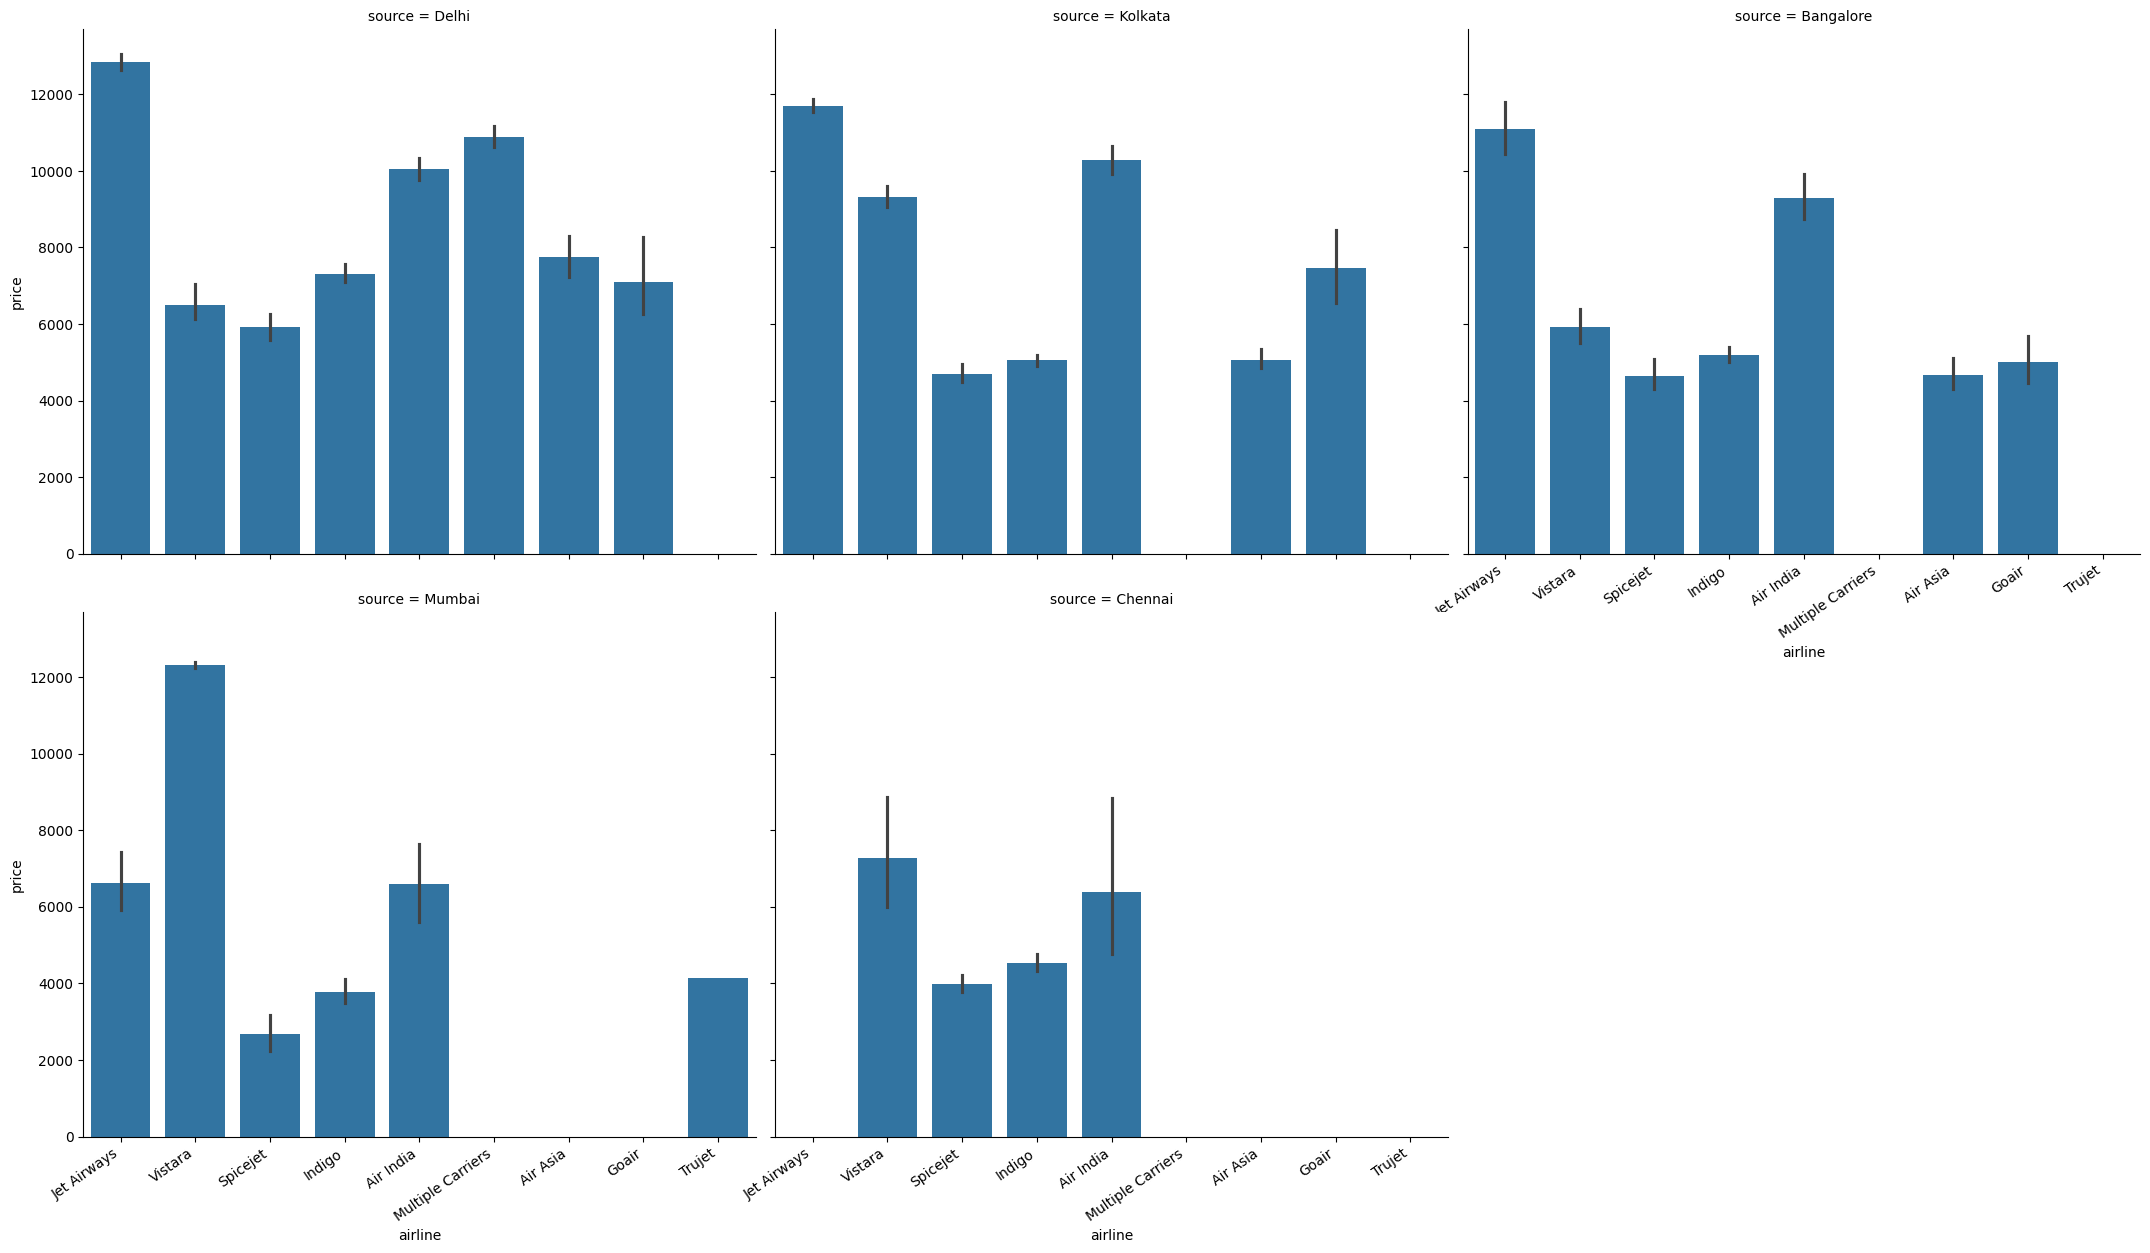

In [109]:
airline_grid = sns.FacetGrid(
    data = data,
    col = "source",
    col_wrap=3,
    height = 6,
    aspect = 1.2, 
    sharey=True
)

airline_grid.map(sns.barplot,"airline","price",order = data.airline.unique())

for ax in airline_grid.axes[2:]:
    eda_helper_functions.rotate_xlabels(ax)

In [213]:
(
    data[data.destination == "Cochin"]
    .source
    .unique()
)

array(['Delhi'], dtype=object)

**Observations**
- `airline` is correlated to `price`
-  All the flights landing in Cochin flew from Delhi

### 7.2 `date_of_journey`

In [113]:
data.date_of_journey

0      2019-03-03
1      2019-03-24
2      2019-04-09
3      2019-04-27
4      2019-06-12
          ...    
6831   2019-06-03
6832   2019-06-24
6833   2019-05-09
6834   2019-05-27
6835   2019-03-03
Name: date_of_journey, Length: 6836, dtype: datetime64[ns]

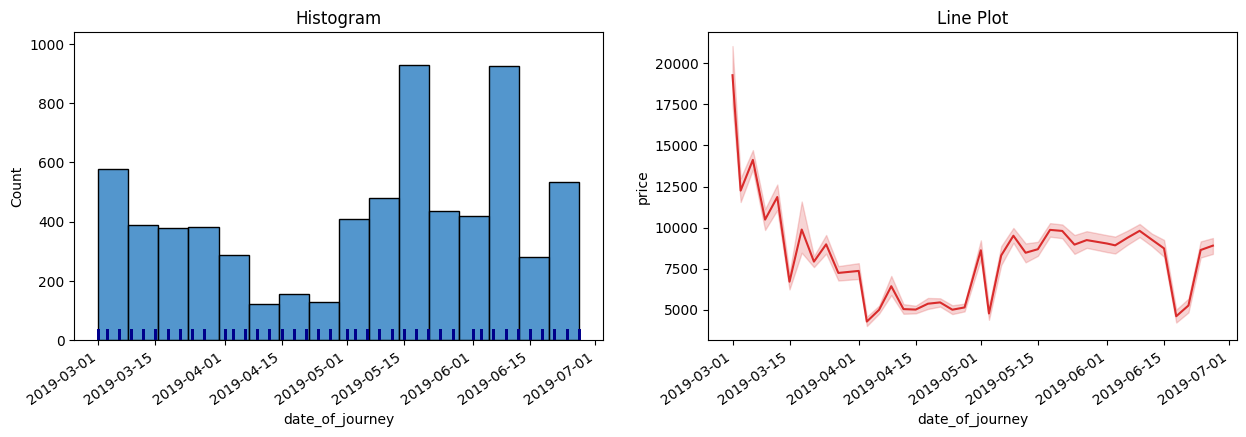

In [116]:
eda_helper_functions.dt_univar_plots(
    data,
    var = 'date_of_journey',
    target = 'price'
)

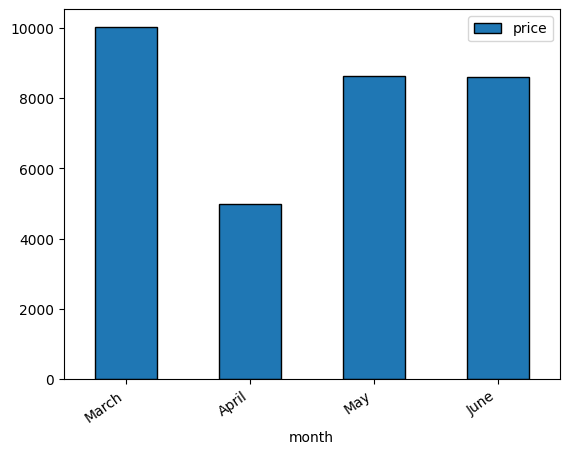

In [125]:
(
    data
    .groupby(pd.Grouper(key = 'date_of_journey', freq = 'M'))
    .price.median()
    .to_frame()
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index = "month")
    .plot(
        kind = "bar",
        edgecolor = "black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)
plt.show()

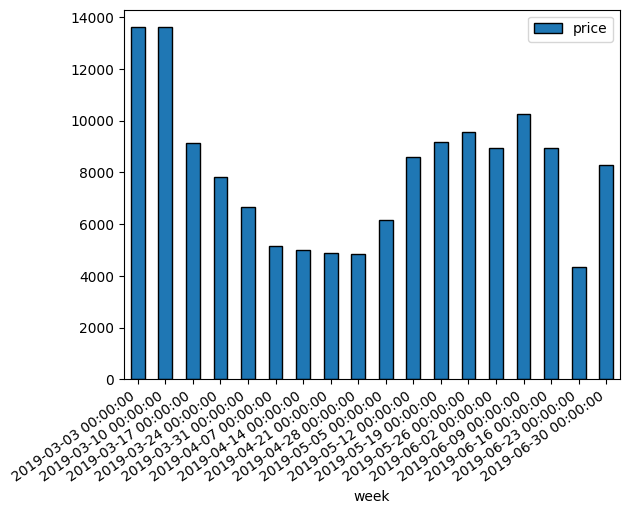

In [126]:
(
    data
    .groupby(pd.Grouper(key = 'date_of_journey', freq = 'W'))
    .price.median()
    .to_frame()
    # .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index = "week")
    .plot(
        kind = "bar",
        edgecolor = "black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)
plt.show()

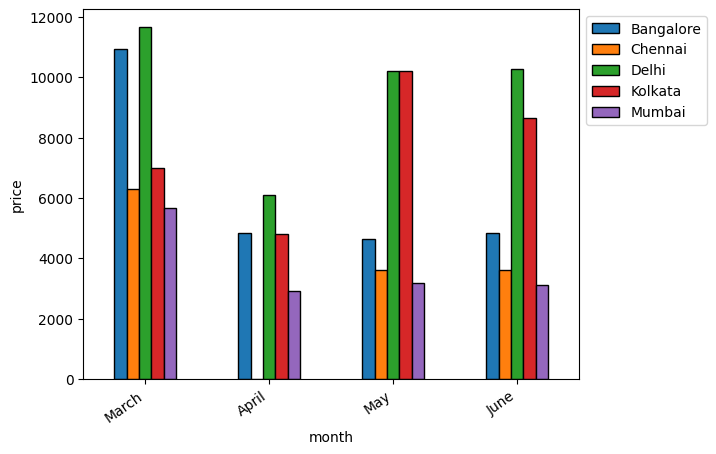

In [216]:
(
    data
    .groupby([pd.Grouper(key = "date_of_journey", freq = "M"),"source"])
    .price.median()
    .unstack(fill_value = 0)
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index = "month")
    .plot(
        kind = "bar",
        edgecolor = "black"
    )
)

ax = plt.gca()
ax.legend(
    loc = "upper left",
    bbox_to_anchor = (1,1)
)
ax.set_ylabel('price')
eda_helper_functions.rotate_xlabels(ax)
plt.show()

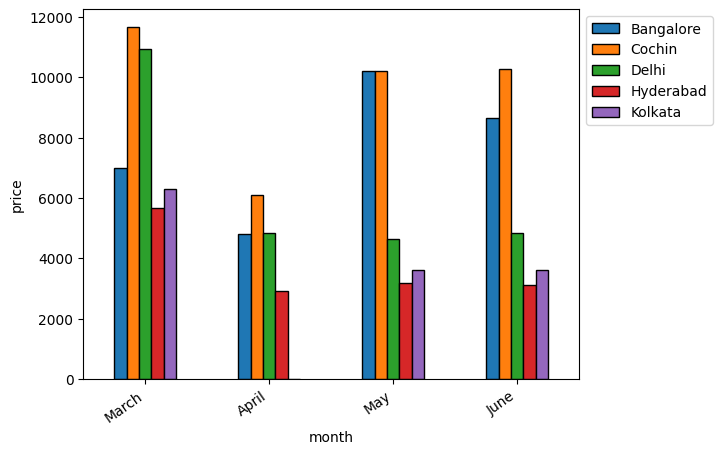

In [217]:
(
    data
    .groupby([pd.Grouper(key = "date_of_journey", freq = "M"),"destination"])
    .price.median()
    .unstack(fill_value = 0)
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index = "month")
    .plot(
        kind = "bar",
        edgecolor = "black"
    )
)

ax = plt.gca()
ax.legend(
    loc = "upper left",
    bbox_to_anchor = (1,1)
)
ax.set_ylabel('price')
eda_helper_functions.rotate_xlabels(ax)
plt.show()

### 7.3 `dep_time`

In [139]:
data.dep_time

0       02:15:00
1       07:10:00
2       09:30:00
3       21:15:00
4       09:45:00
          ...   
6831    04:00:00
6832    05:05:00
6833    10:00:00
6834    07:05:00
6835    14:10:00
Name: dep_time, Length: 6836, dtype: object

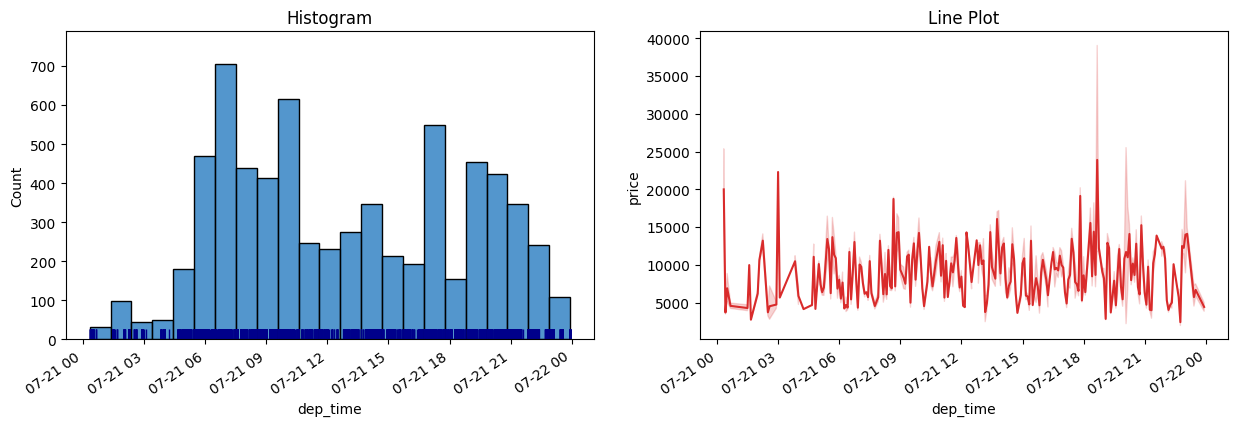

In [154]:
eda_helper_functions.dt_univar_plots(
    data,
    var = 'dep_time',
    target = 'price'
)

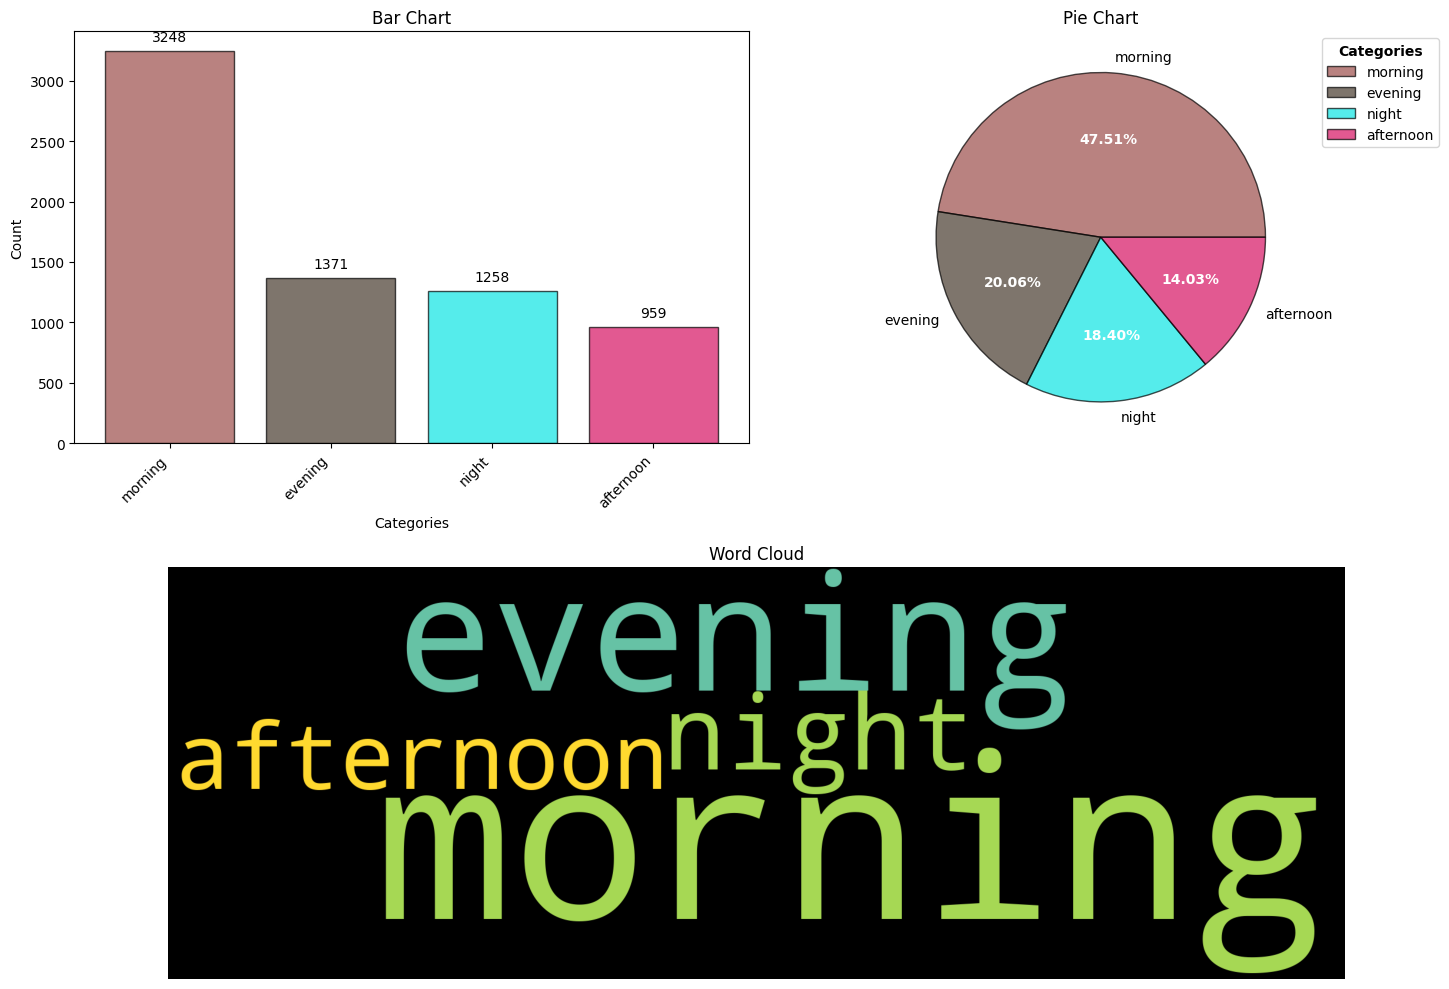

In [171]:
(
    data
    .assign(
            dep_time = lambda df_: (
                np.select([df_.dep_time.dt.hour.between(4,12,inclusive = "left"),
                           df_.dep_time.dt.hour.between(12,16,inclusive = "left"),
                           df_.dep_time.dt.hour.between(16,20,inclusive = "left")],
                           ["morning","afternoon","evening"],
                           default = "night"))
    )
    .pipe(eda_helper_functions.cat_univar_plots,"dep_time",figsize=(15,10))
)

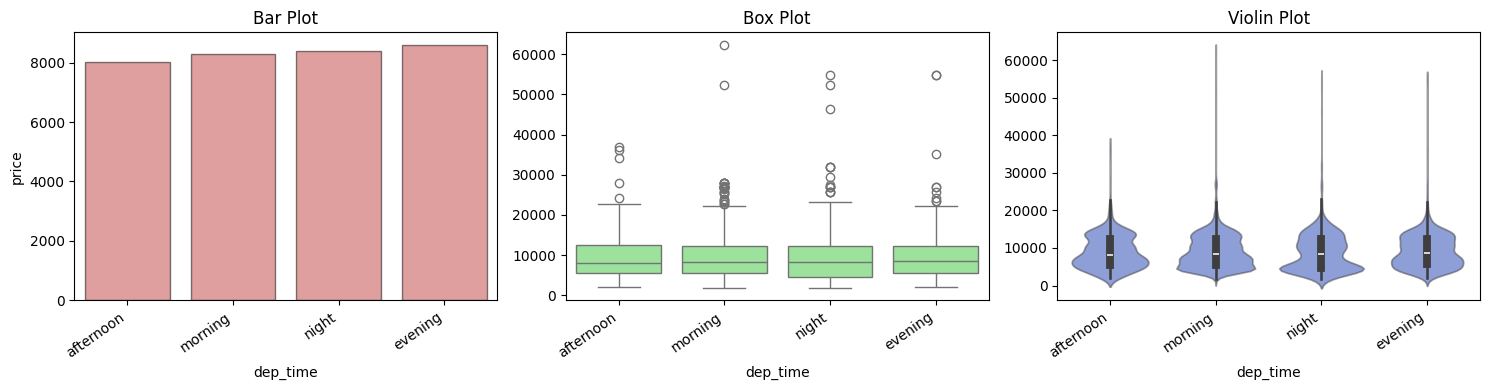

In [169]:
(
    data
    .assign(
            dep_time = lambda df_: (
                np.select([df_.dep_time.dt.hour.between(4,12,inclusive = "left"),
                           df_.dep_time.dt.hour.between(12,16,inclusive = "left"),
                           df_.dep_time.dt.hour.between(16,20,inclusive = "left")],
                           ["morning","afternoon","evening"],
                           default = "night"))
    )
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","dep_time",estimator = "median")
)

### 7.4 `duration`

In [172]:
data.duration

0       1570
1        695
2        170
3        180
4       1420
        ... 
6831     170
6832     665
6833     165
6834     330
6835     310
Name: duration, Length: 6836, dtype: int64

In [173]:
eda_helper_functions.num_summary(
    data,
    var = "duration"
)

0       1570
1        695
2        170
3        180
4       1420
        ... 
6831     170
6832     665
6833     165
6834     330
6835     310
Name: duration, Length: 6836, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,836 / 6,836 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,510.00
75,930.00
90,1440.00
95,1610.00
99,1843.25


,value
mean,637.543885
trimmed mean (5%),604.548261
trimmed mean (10%),576.163620
median,510.000000


,value
var,254617.463326
std,504.596337
IQR,760.000000
mad,340.000000
coef_variance,0.791469


,value
skewness,0.866765
kurtosis,-0.160317


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 3.9298350380507274e-57
Test Statistic       : 0.887359249292345
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 254.55448369292935
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


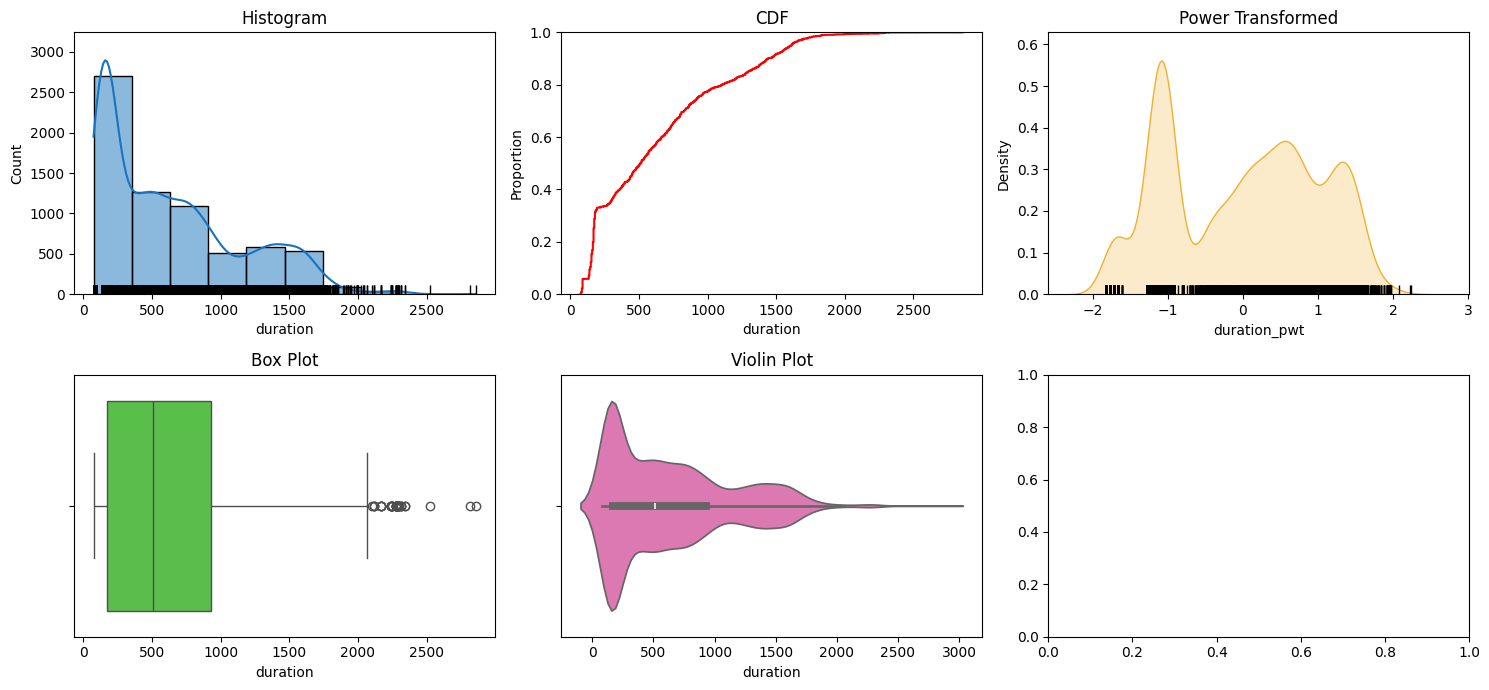

In [177]:
eda_helper_functions.num_univar_plots(
    data,
    var = "duration"
)

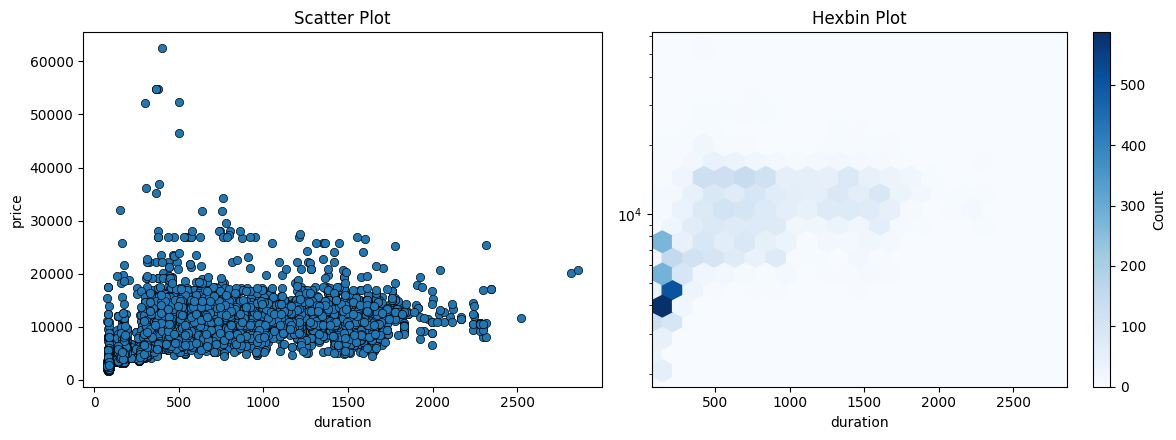

In [181]:
eda_helper_functions.num_bivar_plots(
  data,
  var_x = 'duration',
  var_y = 'price',
  hexbin_kwargs = {
      'yscale': 'log',
      'cmap':'Blues',
      'gridsize': 20
  }
)

In [182]:
eda_helper_functions.num_num_hyp_testing(
    data,
    var1 = 'price',
    var2 = 'duration'
)

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5113889798824633
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6978984138940473
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


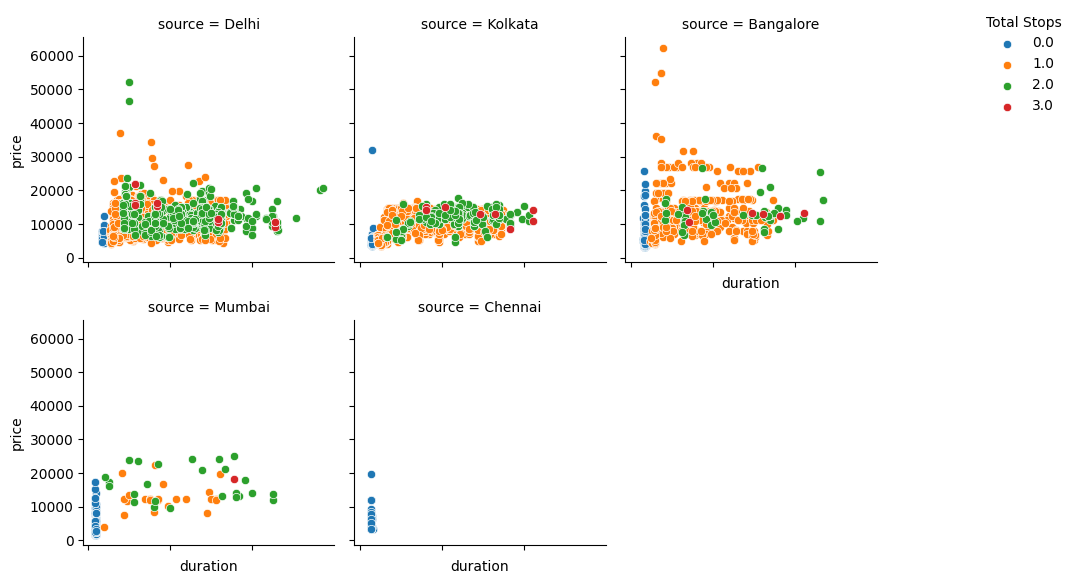

In [196]:
duration_grid = sns.FacetGrid(
    data = data,
    col = 'source',
    col_wrap= 3,
    hue = 'total_stops',
    sharey = True
)

duration_grid.map(sns.scatterplot,'duration','price')

duration_grid.add_legend(
        title='Total Stops', 
        bbox_to_anchor=(1, 1), 
        loc='upper left'
)

for ax in duration_grid.axes.flat:
    eda_helper_functions.rotate_xlabels(ax)


plt.show()

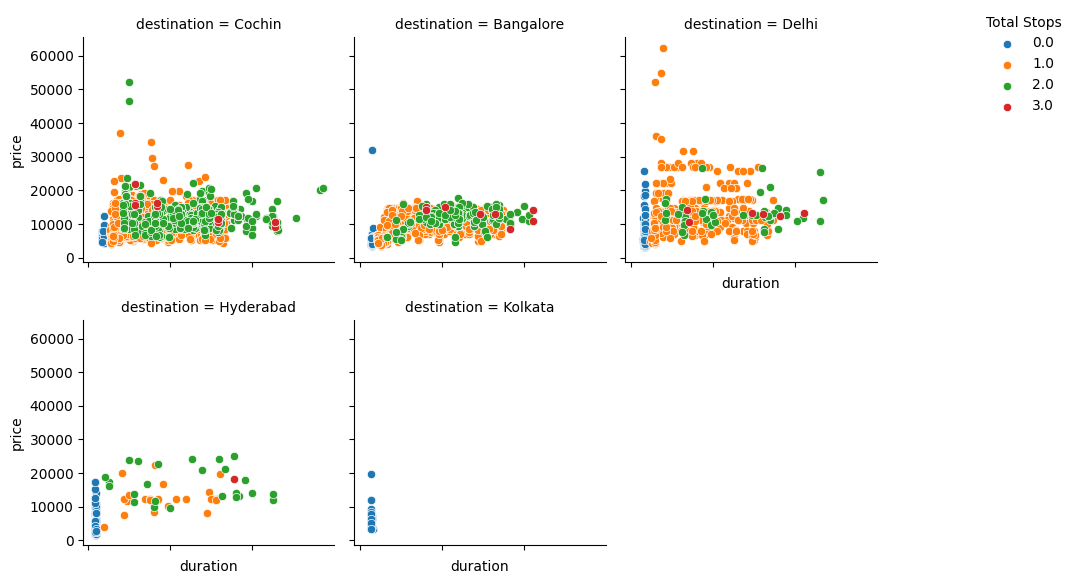

In [194]:
duration_grid = sns.FacetGrid(
    data = data,
    col = 'destination',
    col_wrap= 3,
    hue = 'total_stops',
    sharey = True
)

duration_grid.map(sns.scatterplot,'duration','price')

duration_grid.add_legend(
        title='Total Stops', 
        bbox_to_anchor=(1, 1), 
        loc='upper left'
)

for ax in duration_grid.axes.flat:
    eda_helper_functions.rotate_xlabels(ax)


plt.show()

In [219]:
eda_helper_functions.get_iqr_outliers(data, "duration")

Lower Limit : -970.0
Upper Limit : 2070.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
1060,Air India,2019-03-03,Bangalore,Delhi,2025-07-21 11:05:00,2025-07-21 22:10:00,2105,2.0,No Info,11791
1912,Air India,2019-03-24,Kolkata,Bangalore,2025-07-21 12:00:00,2025-07-21 23:15:00,2115,3.0,No Info,14221
3483,Air India,2019-05-12,Kolkata,Bangalore,2025-07-21 12:00:00,2025-07-21 23:15:00,2115,3.0,No Info,10991
1168,Air India,2019-03-12,Bangalore,Delhi,2025-07-21 06:45:00,2025-07-21 18:05:00,2120,3.0,No Info,13387
2379,Air India,2019-03-03,Delhi,Cochin,2025-07-21 07:05:00,2025-07-21 19:15:00,2170,2.0,No Info,11552
3104,Air India,2019-03-06,Delhi,Cochin,2025-07-21 07:05:00,2025-07-21 19:15:00,2170,2.0,No Info,11552
6335,Air India,2019-03-06,Delhi,Cochin,2025-07-21 07:05:00,2025-07-21 19:15:00,2170,2.0,No Info,11552
6111,Air India,2019-03-03,Delhi,Cochin,2025-07-21 07:05:00,2025-07-21 19:15:00,2170,2.0,No Info,11762
4664,Air India,2019-03-09,Delhi,Cochin,2025-07-21 05:55:00,2025-07-21 19:15:00,2240,2.0,No Info,14483
5107,Air India,2019-05-21,Delhi,Cochin,2025-07-21 05:55:00,2025-07-21 19:15:00,2240,2.0,No Info,10493


### 7.5 `additional_info`

In [221]:
eda_helper_functions.cat_summary(data, "additional_info")

0                           No Info
1                           No Info
2                           No Info
3                           No Info
4                           No Info
                   ...             
6831                        No Info
6832                        No Info
6833                        No Info
6834    In-flight meal not included
6835                        No Info
Name: additional_info, Length: 6836, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,836 / 6,836 rows


,
count,6836
unique,9
top,No Info
freq,5368


,count,percentage
category,,
No Info,5368,78.525453
In-flight meal not included,1249,18.270919
No check-in baggage included,198,2.896431
1 Long layover,13,0.190170
Change airports,4,0.058514
1 Short layover,1,0.014628
Red-eye flight,1,0.014628
2 Long layover,1,0.014628
Business class,1,0.014628


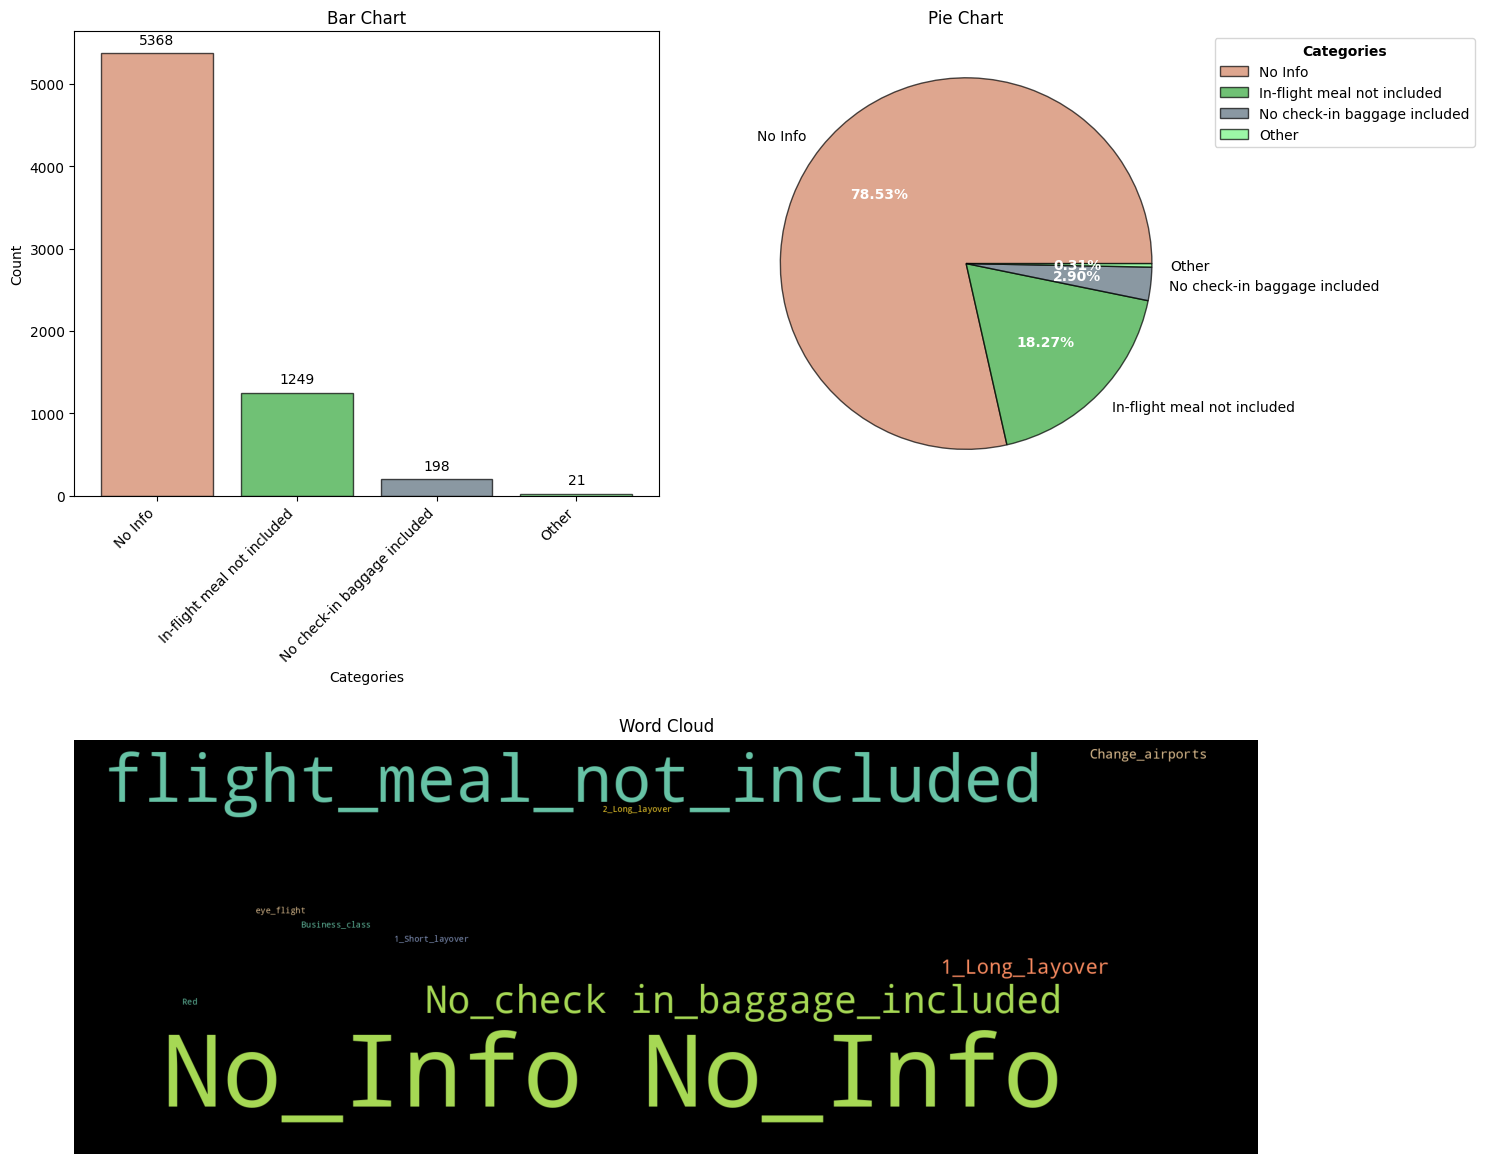

In [225]:
eda_helper_functions.cat_univar_plots(data, var = "additional_info", figsize=(15,12), k=3)

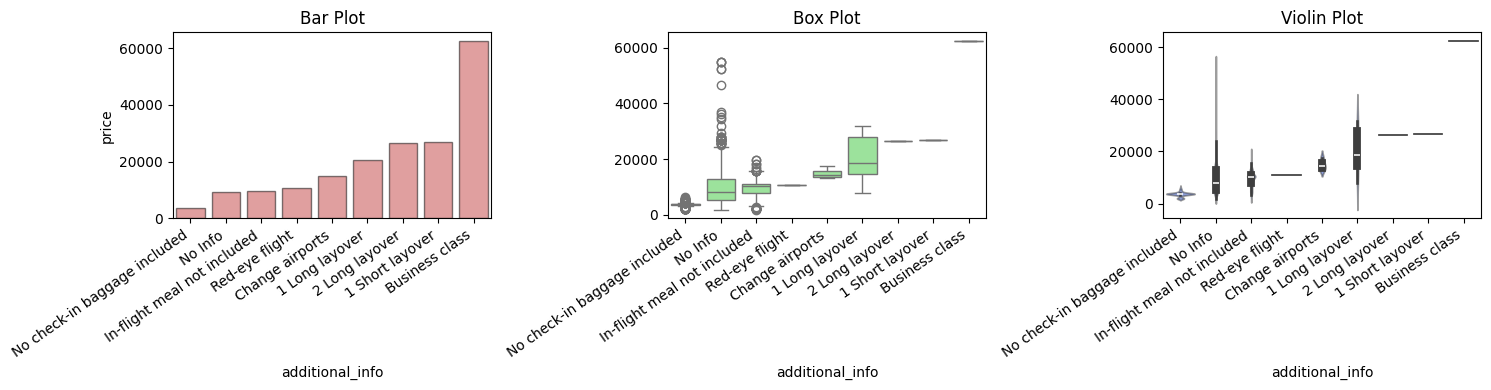

In [226]:
eda_helper_functions.num_cat_bivar_plots(data, "price", "additional_info")

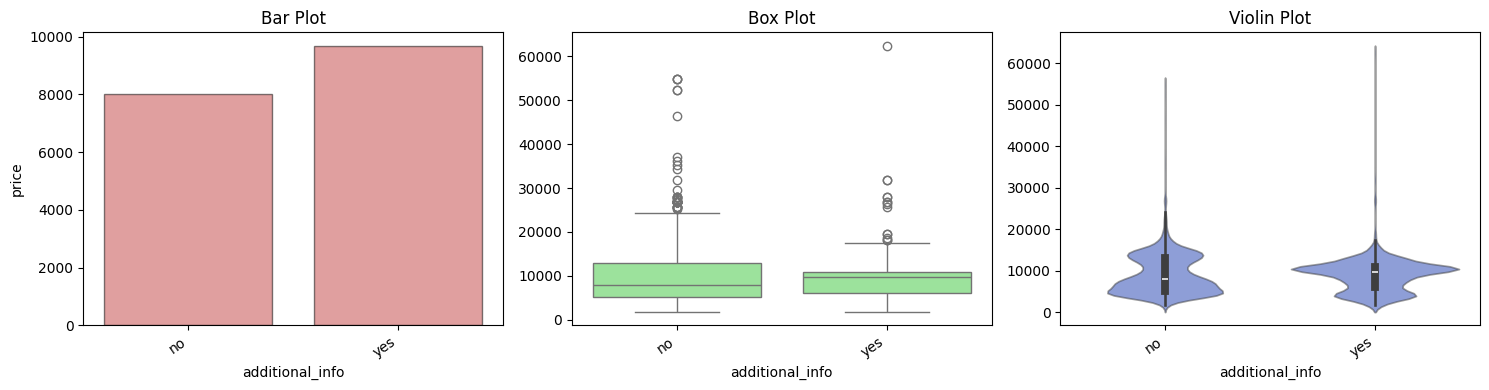

In [231]:
(
    data
    .assign(
        additional_info = (
            data
            .additional_info
            .pipe(lambda ser: np.where(ser.eq("No Info"),"no","yes"))
        )
    )
    .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info",estimator = "median")
)

In [232]:
(
    data
    .assign(
        additional_info = (
            data
            .additional_info
            .pipe(lambda ser: np.where(ser.eq("No Info"),"no","yes"))
        )
    )
    .pipe(eda_helper_functions.num_cat_hyp_testing, "price", "additional_info")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 2.3308521948636516
- p-value              : 0.12687870238862164
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and additional_info are not associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 7.830638908501532e-06
- p-value              : 0.9977672603046547
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and additional_info are not associated to each other


**Observations**
- According to hypothesis testing `price` and `additional_info` are not associated to each other

### 7.6 `source` and `destination`

In [233]:
data.source

0           Delhi
1         Kolkata
2       Bangalore
3       Bangalore
4           Delhi
          ...    
6831    Bangalore
6832        Delhi
6833    Bangalore
6834        Delhi
6835        Delhi
Name: source, Length: 6836, dtype: object

In [234]:
data.destination

0          Cochin
1       Bangalore
2           Delhi
3           Delhi
4          Cochin
          ...    
6831        Delhi
6832       Cochin
6833        Delhi
6834       Cochin
6835       Cochin
Name: destination, Length: 6836, dtype: object

In [237]:
(
    data
    .pipe(eda_helper_functions.cat_summary,"source")
)

0           Delhi
1         Kolkata
2       Bangalore
3       Bangalore
4           Delhi
          ...    
6831    Bangalore
6832        Delhi
6833    Bangalore
6834        Delhi
6835        Delhi
Name: source, Length: 6836, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,836 / 6,836 rows


,
count,6836
unique,5
top,Delhi
freq,2860


,count,percentage
category,,
Delhi,2860,41.837332
Kolkata,1830,26.770041
Bangalore,1443,21.108836
Mumbai,454,6.641311
Chennai,249,3.642481


In [238]:
(
    data
    .pipe(eda_helper_functions.cat_summary,"destination")
)

0          Cochin
1       Bangalore
2           Delhi
3           Delhi
4          Cochin
          ...    
6831        Delhi
6832       Cochin
6833        Delhi
6834       Cochin
6835       Cochin
Name: destination, Length: 6836, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,836 / 6,836 rows


,
count,6836
unique,5
top,Cochin
freq,2860


,count,percentage
category,,
Cochin,2860,41.837332
Bangalore,1830,26.770041
Delhi,1443,21.108836
Hyderabad,454,6.641311
Kolkata,249,3.642481


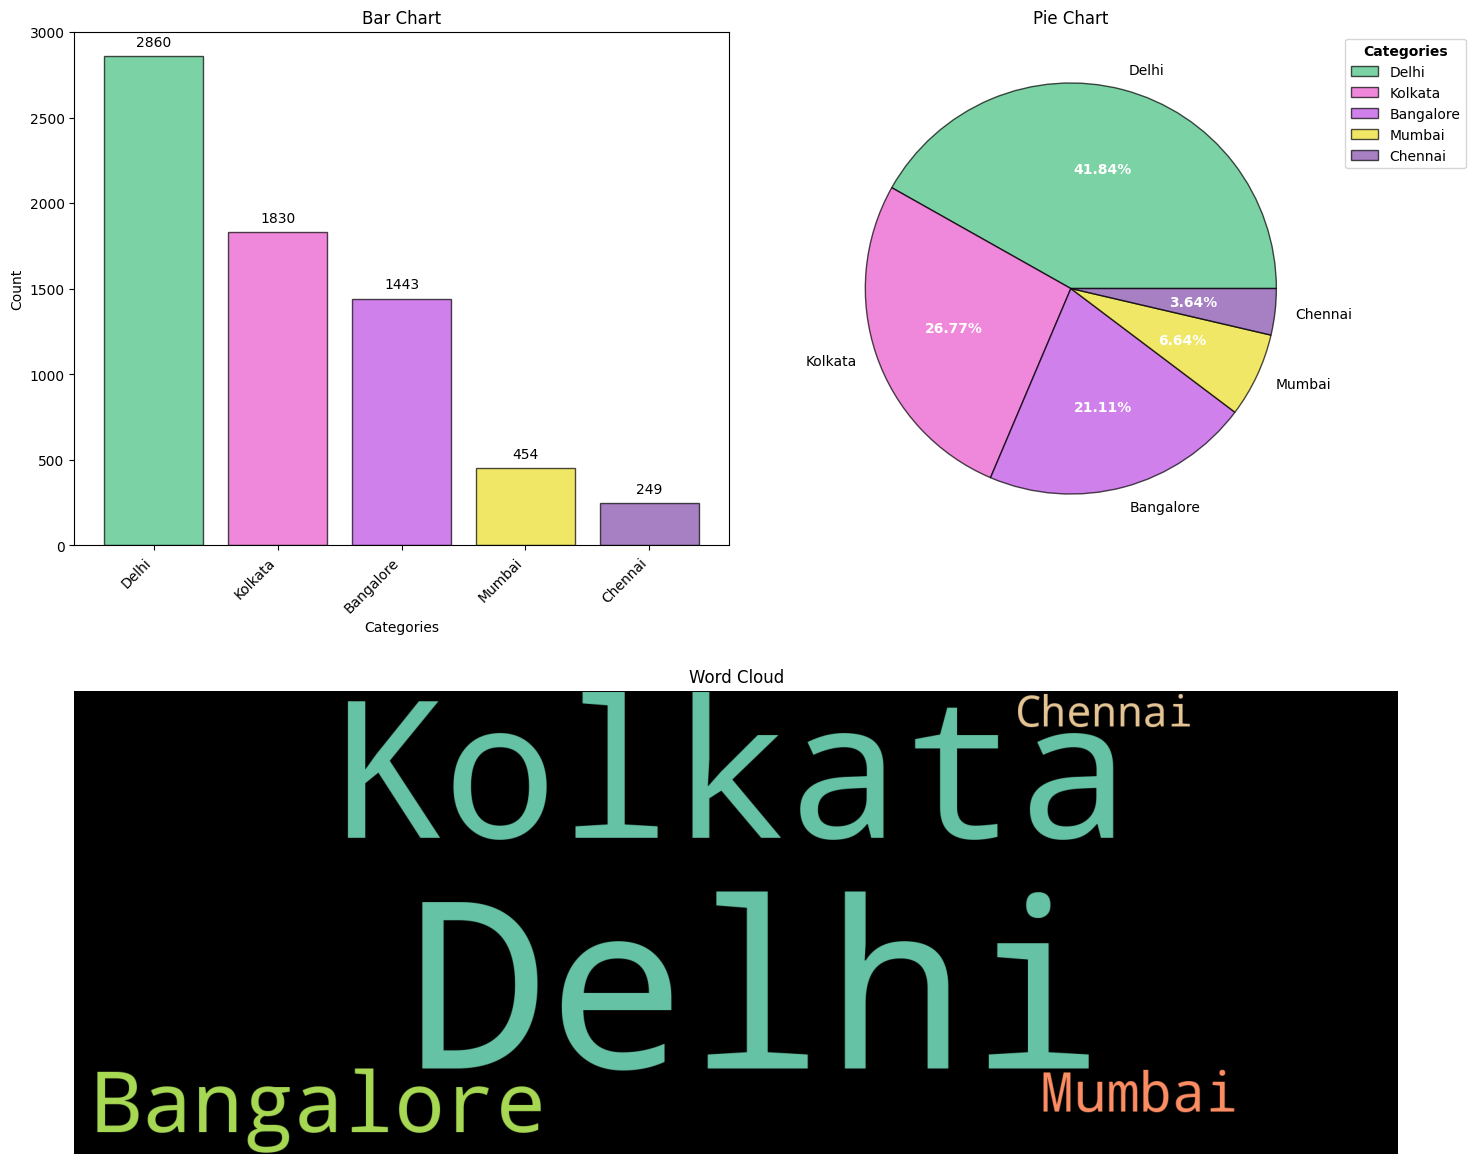

In [240]:
(
    data
    .pipe(eda_helper_functions.cat_univar_plots,"source",figsize = (15,12))
)

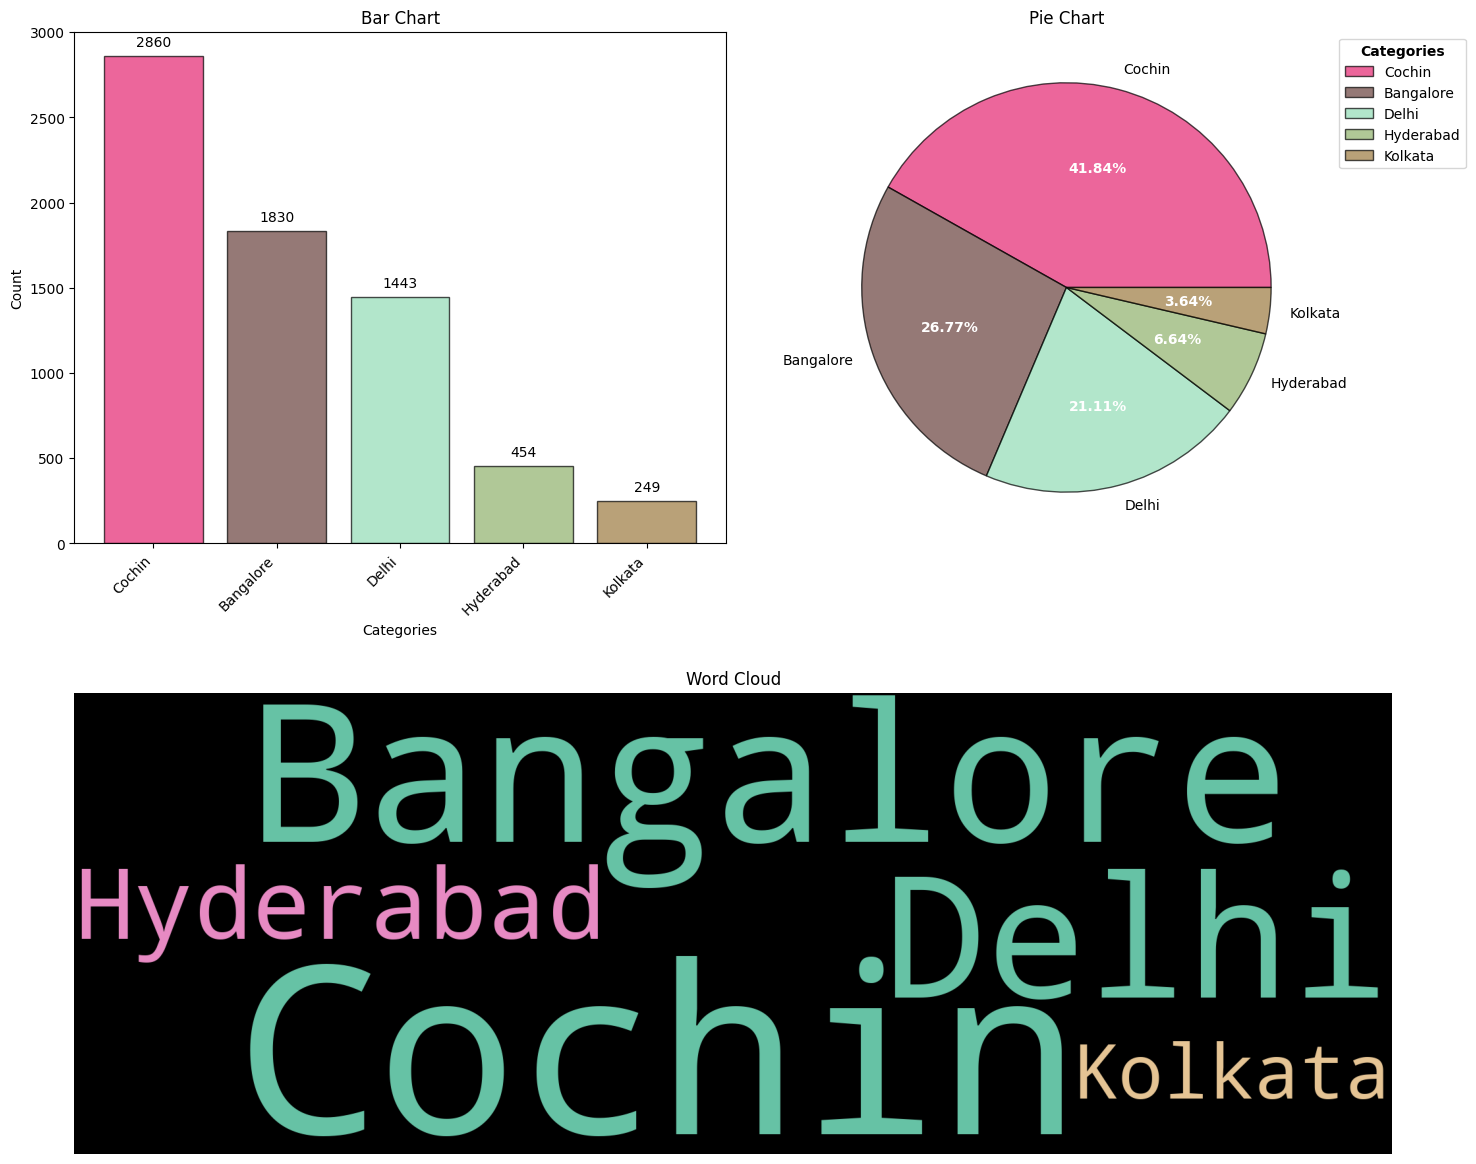

In [241]:
(
    data
    .pipe(eda_helper_functions.cat_univar_plots,"destination",figsize = (15,12))
)

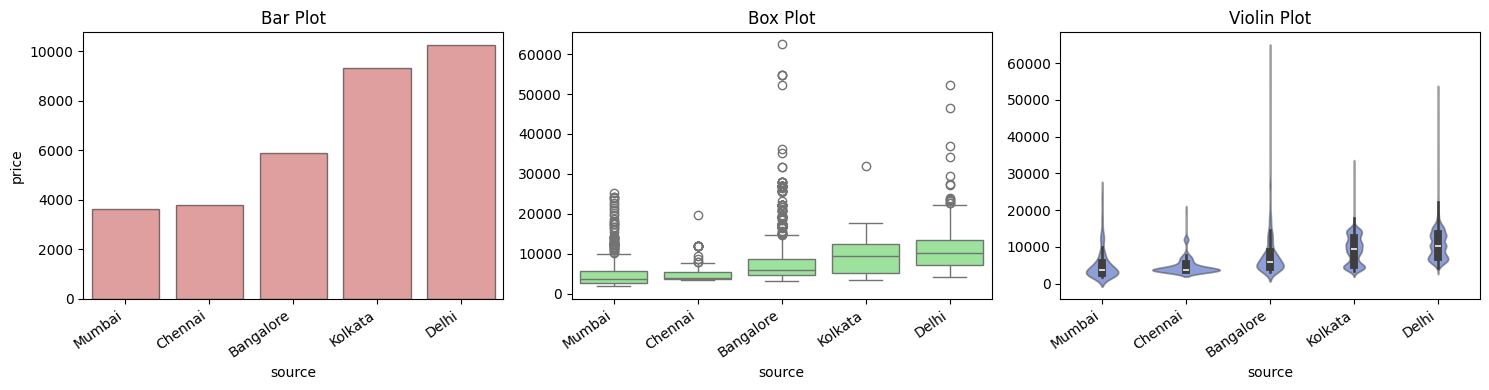

In [243]:
(
    data
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","source",estimator = "median")
)

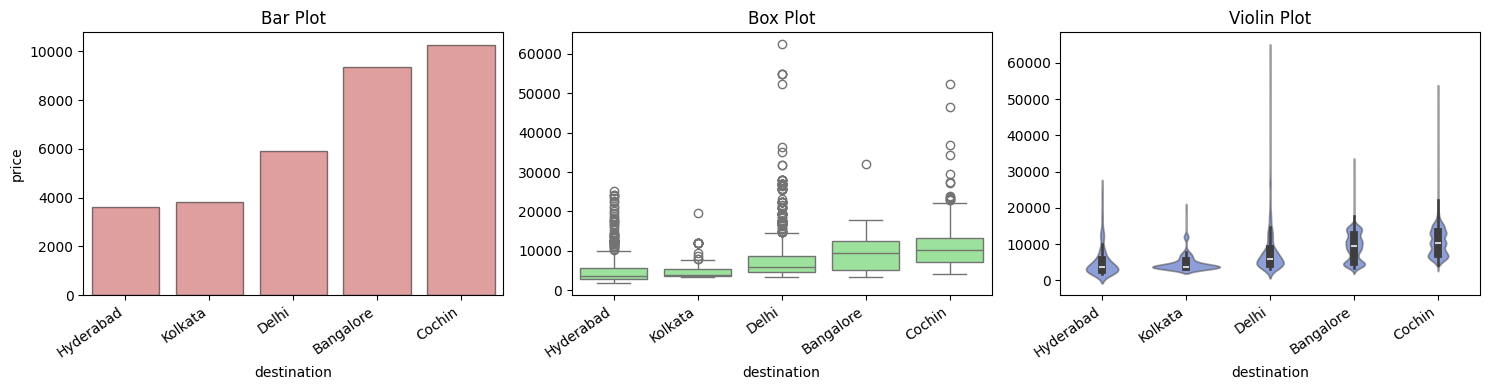

In [244]:
(
    data
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","destination",estimator = "median")
)

In [252]:
(
    data
    .assign(
        source = (
            data
            .source
            .pipe(lambda ser: np.where(ser.isin(["Mumbai","Chennai","Bangalore"]),"Other", ser))
        )
    )
    .pipe(eda_helper_functions.num_cat_hyp_testing, "price","source")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 423.97853645583183
- p-value              : 2.681740832634504e-174
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and source are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 1309.5861784924098
- p-value              : 4.236181429049821e-285
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and source are associated to each other


In [254]:
(
    data
    .assign(
        destination = (
            data
            .source
            .pipe(lambda ser: np.where(ser.isin(["Hyderabad","Kolkata","Delhi"]),"Other", ser))
        )
    )
    .pipe(eda_helper_functions.num_cat_hyp_testing, "price","destination")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 307.0822493755418
- p-value              : 4.973512679448166e-187
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and destination are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 1375.2420890434234
- p-value              : 6.940964354216939e-298
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and destination are associated to each other


### 7.7 `total_stops`

In [256]:
data.total_stops

0       1.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
6831    0.0
6832    1.0
6833    0.0
6834    1.0
6835    1.0
Name: total_stops, Length: 6836, dtype: float64

In [260]:
(
    data
    .pipe(eda_helper_functions.cat_summary, "total_stops")
)

0       1.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
6831    0.0
6832    1.0
6833    0.0
6834    1.0
6835    1.0
Name: total_stops, Length: 6836, dtype: float64

Data Type      : float64
Cardinality    : 4 categories
Missing Data   : 1 rows (0.01 %)
Available Data : 6,835 / 6,836 rows


,
count,6835.000000
mean,0.819166
std,0.676164
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,3.000000


,count,percentage
category,,
1.0,3583,52.421361
0.0,2260,33.065106
2.0,960,14.045355
3.0,32,0.468178


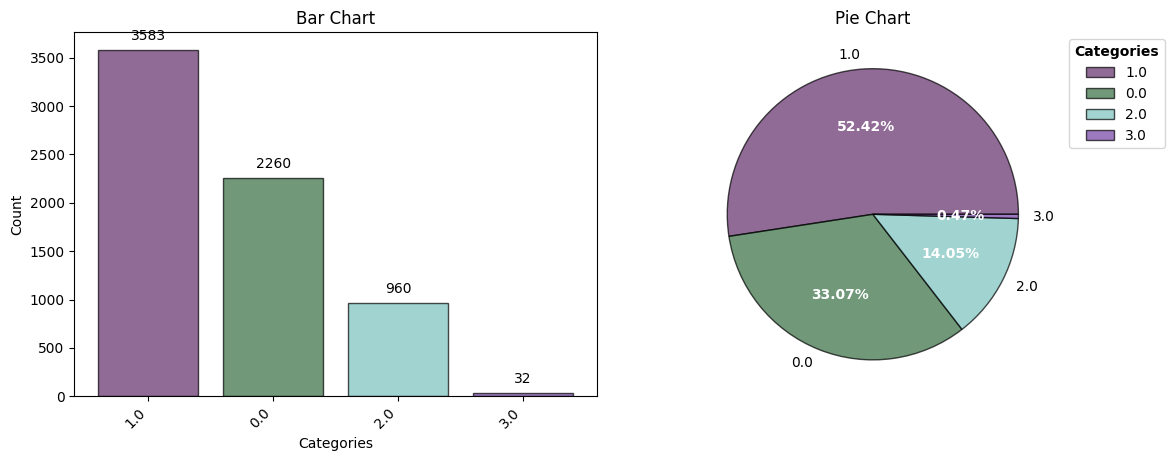

In [262]:
(
    data
    .pipe(eda_helper_functions.cat_univar_plots, "total_stops", show_wordcloud = False)
)

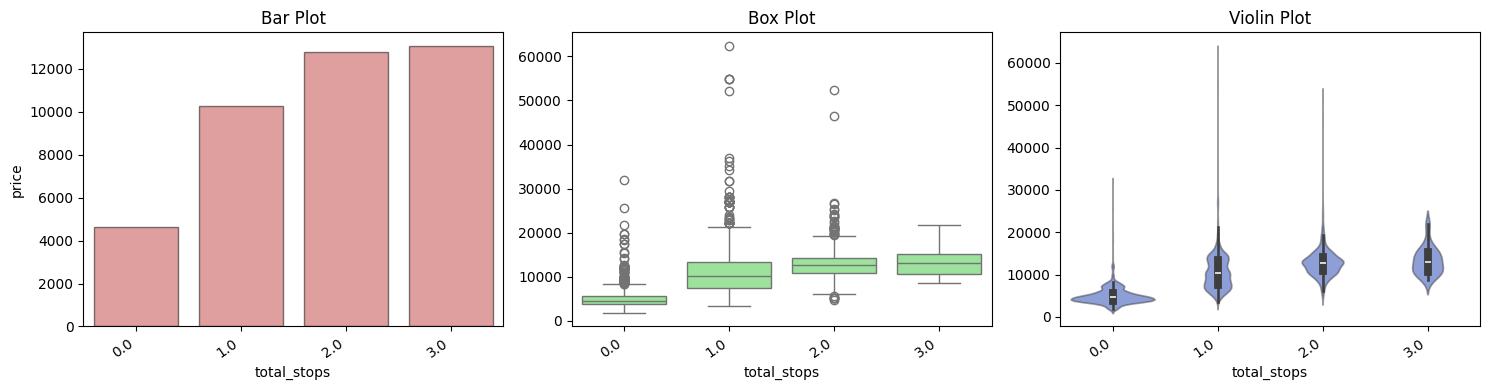

In [265]:
(
    data
    .pipe(eda_helper_functions.num_cat_bivar_plots, "price","total_stops", estimator = "median")
)

In [274]:
(
    data
    .assign(
        total_stops = (
            lambda data: np.select([
                (data.total_stops.ge(2.0)),
                (data.total_stops.eq(1.0))
            ],
            [
                "multiple stops",
                "one stop",
            ],default = "non stop")
        )
    )
    .pipe(eda_helper_functions.num_cat_hyp_testing,"price","total_stops")
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 2370.314337558894
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and total_stops are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3729.586328539583
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and total_stops are associated to each other


In [281]:
# alternate way to write above code
# (
#     data
#     .assign(
#         total_stops = (
#                    data
#                    .total_stops
#                    .pipe(
#                             lambda ser: np.select([
#                                   (ser.ge(2.0)),
#                                   (ser.eq(1.0))
#                                 ],
#                                 ["multiple stops","one stop"],
#                                 default = "non stop")
#                    )
#         )
#     )
#     .pipe(eda_helper_functions.num_cat_hyp_testing,"price","total_stops")
# )

### 7.8 `price`

In [282]:
data.price

0       17024
1       16932
2        4423
3        3943
4        7480
        ...  
6831     3943
6832     6442
6833     5228
6834    12898
6835    22794
Name: price, Length: 6836, dtype: int64

In [284]:
(
    data
    .pipe(eda_helper_functions.num_summary,"price")
)

0       17024
1       16932
2        4423
3        3943
4        7480
        ...  
6831     3943
6832     6442
6833     5228
6834    12898
6835    22794
Name: price, Length: 6836, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,836 / 6,836 rows


,value
percentile,
0,1759.0
5,3543.0
10,3943.0
25,5228.0
50,8366.0
75,12373.0
90,14714.0
95,15812.0
99,22270.0


,value
mean,9080.772528
trimmed mean (5%),8820.825154
trimmed mean (10%),8744.368556
median,8366.000000


,value
var,2.122820e+07
std,4.607407e+03
IQR,7.145000e+03
mad,3.429000e+03
coef_variance,5.073805e-01


,value
skewness,1.682190
kurtosis,10.394538


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 2.9415161862002214e-55
Test Statistic       : 0.8983872766714938
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 82.95249168065402
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


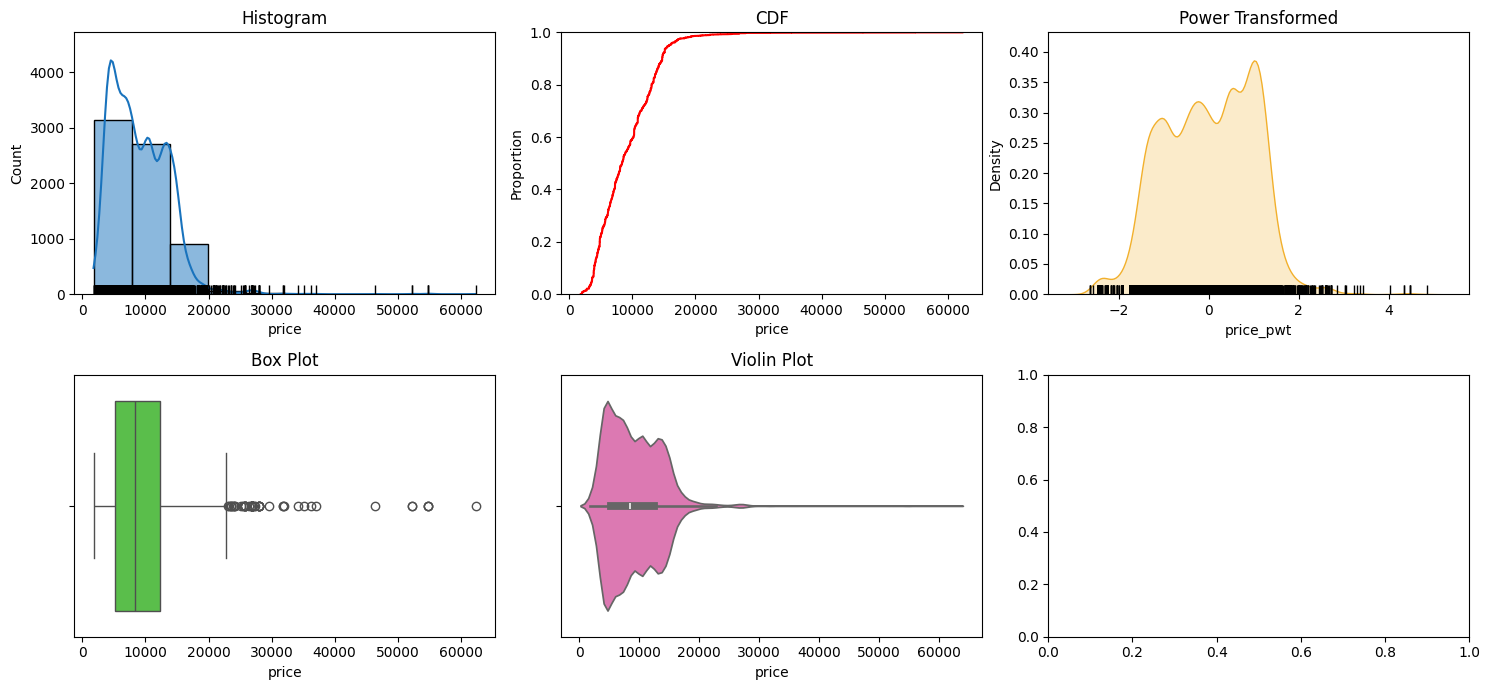

In [285]:
(
    data
    .pipe(eda_helper_functions.num_univar_plots,"price")
)